# polynomial curve fitting 

- Imagine you have a set of data points.
- which contain of pairs : 1 ) Input(f(x)) and 2 ) Output(2x + 1)
- f(x) = 2x + 1
- so, if you have N obervation so, you have N pairs of input x and output t.
- The input data is evenly spaced under the range of 0 to 1 if you divide the interval [0,1] into 10 parts you get 0.1,0.2......,1.0.
- After calculating t, you are adding some random noise to it using Gaussina Distribution, which means the noise value is mostly small
- but can occassionally be larger.


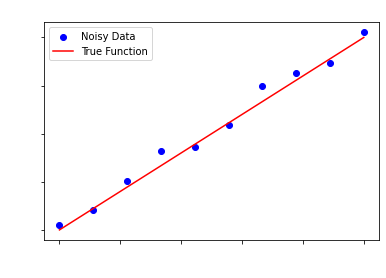

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input data
N = 10
x = np.linspace(0, 1, N)

# Define the function
def f(x):
     return 2 * x + 1

# Generating the target data with noise
np.random.seed(42)
noise = np.random.normal(0, 0.1, N)
t = f(x) + noise
# Plot the data
plt.scatter(x, t, color='blue', label='Noisy Data')
plt.plot(x, f(x), color='red', label='True Function')
plt.xlabel('x', color = 'white')
plt.ylabel('t', color = 'white')
plt.title('Generated Data with Noise', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.legend()
plt.show()

w0: 0.2700000000000027
w1: 0.9300000000000004


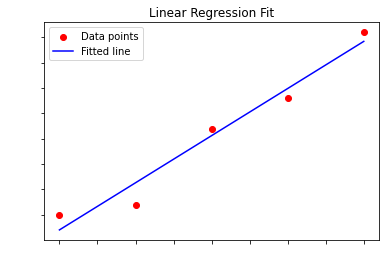

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
t = np.array([1.5, 1.7, 3.2, 3.8, 5.1])

# Number of data points
N = len(x)

# Design matrix X (including bias term)
X = np.vstack([np.ones(N), x]).T

# Calculate weights using the Normal Equation
# w = (X^T * X)^(-1) * X^T * t
w = np.linalg.inv(X.T @ X) @ X.T @ t

# Extract weights
w0, w1 = w

print(f"w0: {w0}")
print(f"w1: {w1}")

# Predicted values
y_pred = w0 + w1 * x

# Plot the data points and the fitted line
plt.scatter(x, t, color='red', label='Data points')
plt.plot(x, y_pred, color='blue', label='Fitted line')
plt.xlabel('x', color = 'white')
plt.ylabel('t', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()


# Bias And Variance

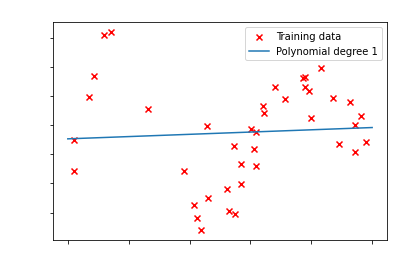

Degree 1 polynomial, MSE: 0.71


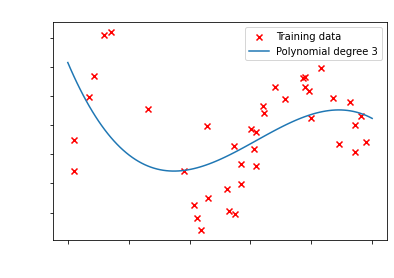

Degree 3 polynomial, MSE: 0.54


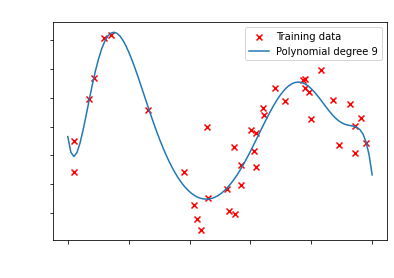

Degree 9 polynomial, MSE: 0.13


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.5

# Function to plot the data and the model
def plot_model(X, y, model, degree):
    plt.scatter(X, y, color='red', marker='x', label='Training data')
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'Polynomial degree {degree}')
    plt.xlabel('X', color = 'white')
    plt.ylabel('y', color = 'white')
    plt.title(f'Polynomial degree {degree}', color = 'white')
    plt.xticks(color = 'white')
    plt.yticks(color = 'white')
    plt.legend()
    plt.show()

# Fit models with different polynomial degrees
degrees = [1, 3, 9]  # Varying complexity: linear, cubic, high-degree polynomial

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    plot_model(X, y, model, degree)
    
    # Calculate and print the Mean Squared Error
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f'Degree {degree} polynomial, MSE: {mse:.2f}')
